In [178]:

from numpy.random import normal, seed
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from pylab import rcParams
from statsmodels.tsa.arima_process import ArmaProcess
import plotly 
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
import plotly.express as px
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

# Pulled data merged, added predefined dates for checking if there is any time-related event.

In [179]:
datesfor19 = pd.date_range(start='5/11/2019', end='12/31/2019')

In [180]:
twoenineteen = pd.read_excel("Master Data.xlsx", sheet_name ='2019')

In [181]:
twoenineteen.index=datesfor19

In [182]:
datesfor20 = pd.date_range(start='1/1/2020', end='12/30/2020')

In [183]:
twenty = pd.read_excel("Master Data.xlsx", sheet_name ='2020')

In [184]:
twenty.index=datesfor20

In [185]:
datesfor21 = pd.date_range(start='2021-01-01', end='2021-12-31', inclusive="both")

In [186]:
twentyone = pd.read_excel("Master Data.xlsx", sheet_name ='2021')

In [187]:
twentyone.index=datesfor21

In [188]:
twentyone

,1,2,3,4,5
2021-01-01,9,17,23,37,47
2021-01-02,31,33,35,37,50
2021-01-03,10,15,21,25,30
2021-01-04,3,24,43,47,51
2021-01-05,19,29,45,51,52
...,...,...,...,...,...
2021-12-27,5,29,36,38,59
2021-12-28,13,24,35,49,50
2021-12-29,17,19,35,57,58
2021-12-30,6,25,43,55,56


In [189]:
datesfor22= pd.date_range(start='2022-01-01', end='2022-08-24', inclusive="both")

In [190]:
twentytwo = pd.read_excel("Master Data.xlsx", sheet_name ='2022')

In [191]:
twentytwo.index=datesfor22

In [192]:
twentytwo

,1,2,3,4,5
2022-01-01,5,11,19,23,33
2022-01-02,8,14,19,27,28
2022-01-03,2,39,42,47,50
2022-01-04,5,13,19,20,29
2022-01-05,4,33,39,51,58
...,...,...,...,...,...
2022-08-20,13,23,37,57,60
2022-08-21,2,21,30,48,58
2022-08-22,5,14,48,41,57
2022-08-23,6,20,21,34,49


In [193]:
df = pd.concat([twoenineteen,twenty,twentyone,twentytwo],axis=0)

In [194]:
df['sum'] = df.sum(axis=1)

In [195]:
df.columns=['Ball 1','Ball 2','Ball 3','Ball 4','Ball 5','sum']

 # Added Dates and a "sum" column. For checking if there is a pattern in the sum of the drawed 5 balls.

In [196]:
df

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,sum
2019-05-11,5,9,25,33,55,127
2019-05-12,20,27,34,57,59,197
2019-05-13,5,44,45,47,54,195
2019-05-14,17,18,42,50,57,184
2019-05-15,1,22,23,29,52,127
...,...,...,...,...,...,...
2022-08-20,13,23,37,57,60,190
2022-08-21,2,21,30,48,58,159
2022-08-22,5,14,48,41,57,165
2022-08-23,6,20,21,34,49,130


# Distribution of the sum of the balls seems like normal distributions

In [197]:
df['sum'].plot(backend='plotly')

In [198]:
df['sum'].hist(backend='plotly')

# Distplot for sum column

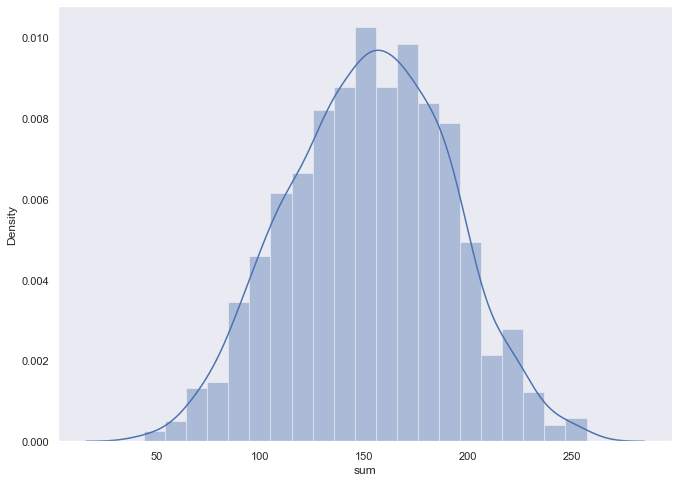

In [199]:
ax = sns.distplot(df['sum'])

# Correlations

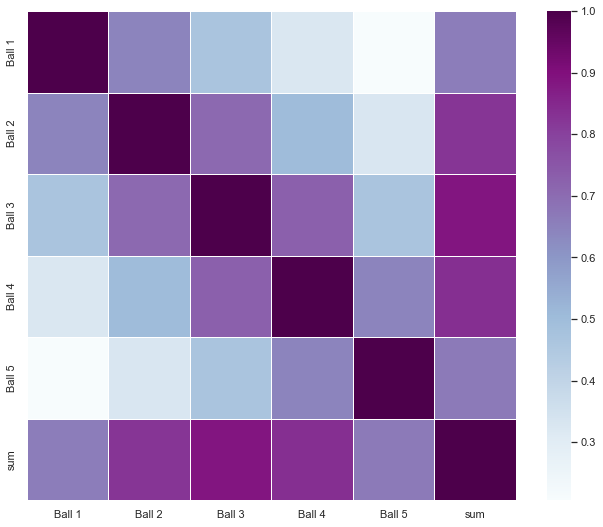

In [200]:
corr_all = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

# Distribution of Ball 1 

<AxesSubplot:>

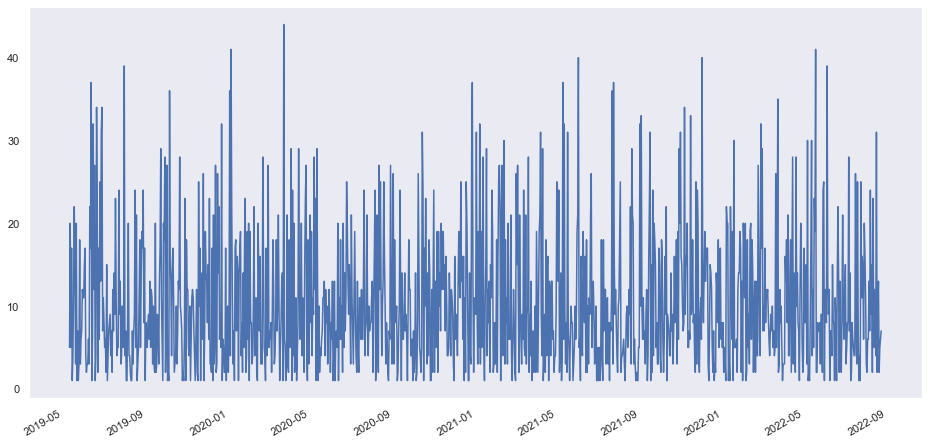

In [201]:
df["Ball 1"].plot(figsize=(16,8))

# Decomposition of Ball 1

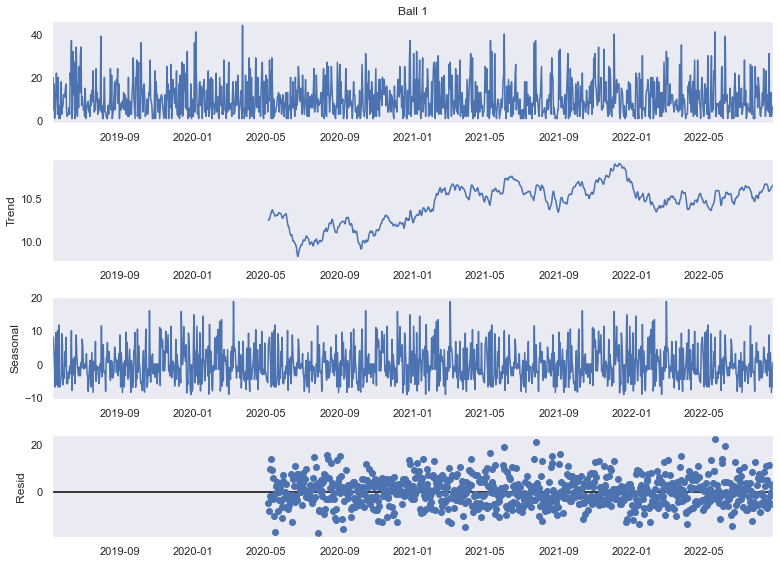

In [202]:
# Now, for decomposition...
Ball1Decomposed = sm.tsa.seasonal_decompose(df["Ball 1"] ,two_sided=False, period=360) 
figure = Ball1Decomposed.plot()
plt.show()

# Checked for seasonality/trends, but no clear trends to talk about.

# According to autocorrelation there is no correlation between Ball 1 - itself

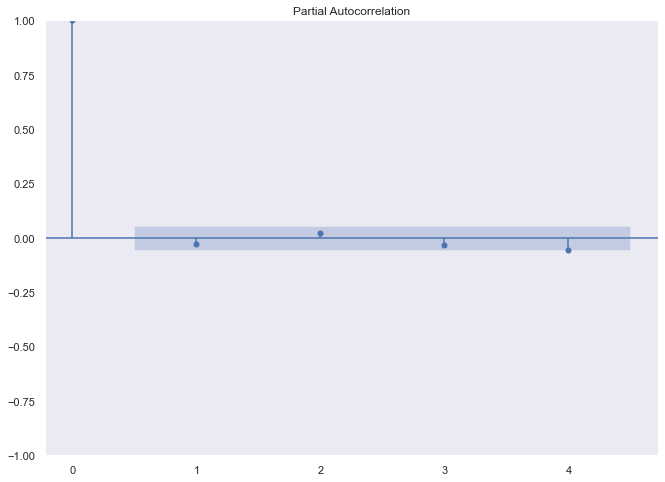

In [203]:
# Partial Autocorrelation for Ball 1 
plot_pacf(df["Ball 1"], lags=4)
plt.show()

# Generating a random walk

## A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.


## In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

## Random walks can't be forecasted because well, noise is random.

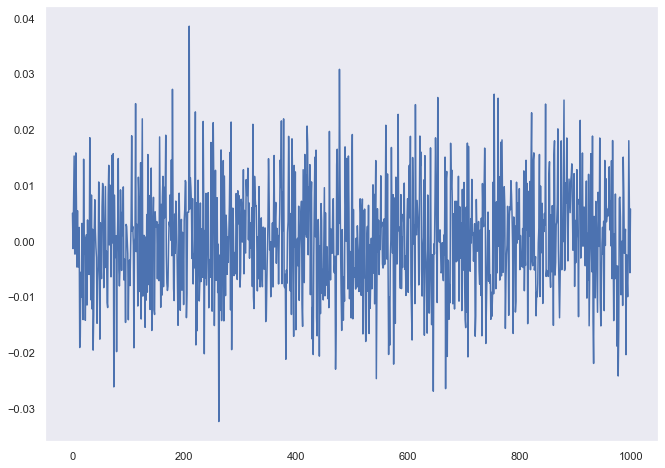

In [204]:
seed(42)

random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [205]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

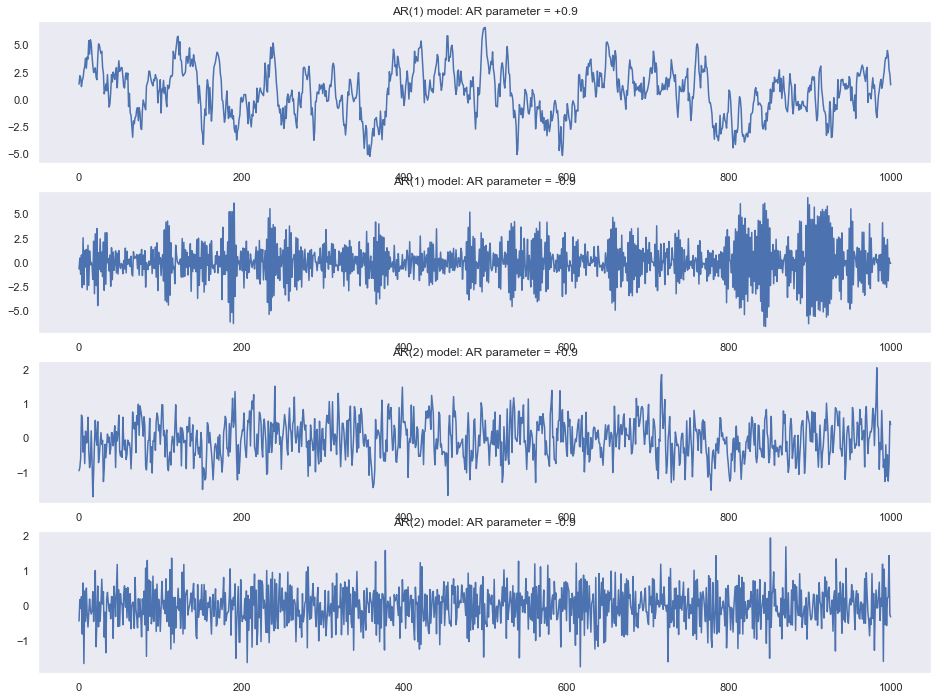

In [206]:

# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

In [207]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(sim1, order=(1,0,1))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1415.661
Date:                Sun, 04 Sep 2022   AIC                           2839.323
Time:                        18:06:16   BIC                           2858.954
Sample:                             0   HQIC                          2846.784
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7076      0.295      2.396      0.017       0.129       1.286
ar.L1          0.8936      0.016     55.836      0.000       0.862       0.925
ma.L1         -0.0101      0.035     -0.289      0.7

In [208]:
import math
from sklearn.metrics import mean_squared_error

In [209]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 1.0410404292233542.


# From this plots, we can see the autocorrelations are weak, distributions are normal distributions.
# There is no trends clearly to obtain.


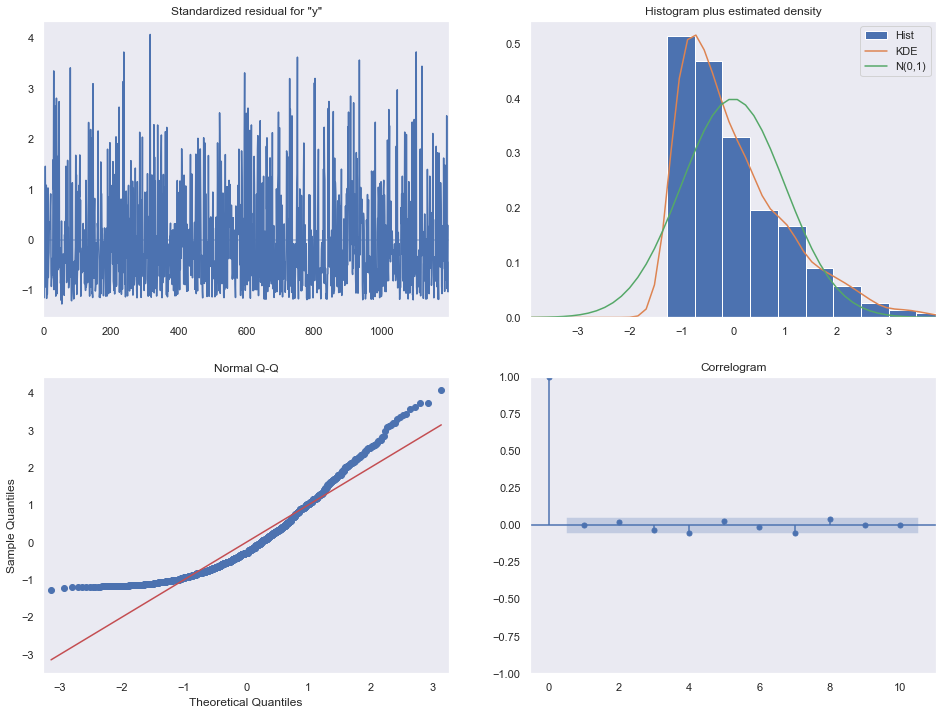

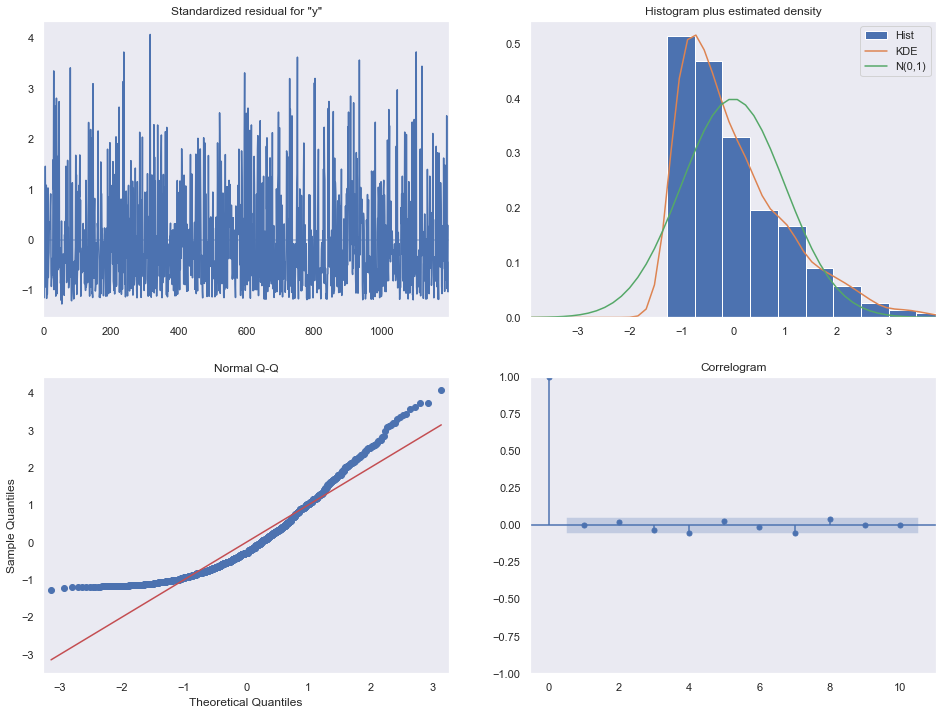

In [210]:

ball1 = sm.tsa.arima.ARIMA(df["Ball 1"].diff().iloc[1:].values, order=(1,0,1))
res = ball1.fit()
res.plot_diagnostics()

In [211]:
res.predict(start=1000, end=1100)

array([  9.83265225,   8.79424791,  -7.67630884,   5.70707632,
         1.58615854,   7.75816674,  -8.71138955,  -9.73134244,
         4.68299164,  -7.66799714,  -3.54457246,   8.80588277,
         1.59525016,  -2.52159702,   8.79898337,  -2.52720731,
         6.73560803,   6.72927934, -16.94163152,  -5.60687126,
         4.68788303,   6.74138074, -22.07410073,  -6.61874958,
       -18.95881702,   3.69579885,   0.60577916,   3.69219047,
        -6.60015917,   2.66669128,  -1.45123435,  -0.42063157,
        -1.44884447,   1.63957448,   4.72501056,   6.77856086,
         3.68557459,   1.62448532,   3.68103886,   0.59104184,
         5.73534344,   3.67229304,   6.75581435,   5.72071217,
       -15.89179105,   5.73102825,  -1.4766093 , -25.14013106,
         8.83860153,   7.80154701,  -1.46591605,   2.65147102,
         0.59138706,   5.73575459,   9.84632147,   7.77942516,
         7.77235297,   7.76529442,  -5.61787301,  -2.52548374,
        -7.66748598,   2.62937498, -10.74897895,   6.75

In [212]:
rmse = math.sqrt(mean_squared_error(df["Ball 1"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.773342972269178.


# I saved the file with the dates added to be used in the deep learning model.

In [213]:
df.to_csv("addeddates.csv")

In [214]:
q = df['Ball 2'] == 21

In [215]:
j=0
for i in q:
    if i==True:
        j= j+1
        
print(j)

59


In [216]:
df

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,sum
2019-05-11,5,9,25,33,55,127
2019-05-12,20,27,34,57,59,197
2019-05-13,5,44,45,47,54,195
2019-05-14,17,18,42,50,57,184
2019-05-15,1,22,23,29,52,127
...,...,...,...,...,...,...
2022-08-20,13,23,37,57,60,190
2022-08-21,2,21,30,48,58,159
2022-08-22,5,14,48,41,57,165
2022-08-23,6,20,21,34,49,130


# Checked for why some of the predictions happened.It's because there is 8 draws that Ball 1 equals 5 and Ball 2 equals 14.

In [217]:
df.loc[(df['Ball 1'] == 5) & (df['Ball 2'] == 14)]

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,sum
2020-03-18,5,14,18,23,51,111
2020-04-01,5,14,18,27,46,110
2020-10-10,5,14,20,31,42,112
2020-10-13,5,14,35,47,51,152
2021-05-27,5,14,21,38,42,120
2021-07-03,5,14,28,39,40,126
2021-08-07,5,14,20,23,37,99
2022-08-22,5,14,48,41,57,165


In [218]:
df.loc[(df['Ball 4'] == 42) & (df['Ball 5'] == 60)]

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,sum
2020-04-15,14,26,33,42,60,175


In [219]:
df = df.reset_index()

In [220]:
lasttimes = df[800:]

In [221]:
lasttimes['sum'].hist(backend='plotly')

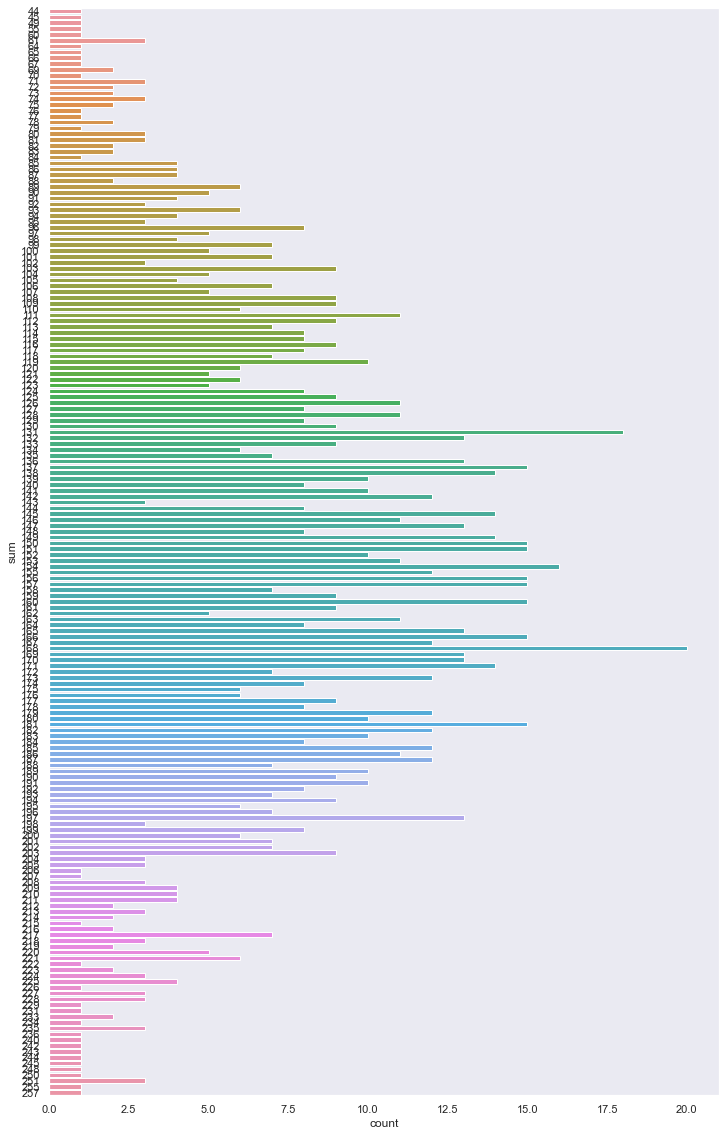

In [222]:
# When order of number increase, value of number increases too. 
#10 times sum of the datas are 168

import seaborn as sns
import matplotlib as mpl
mpl.rc("figure", figsize=(12, 20))
ax = sns.countplot(y="sum", data=df)

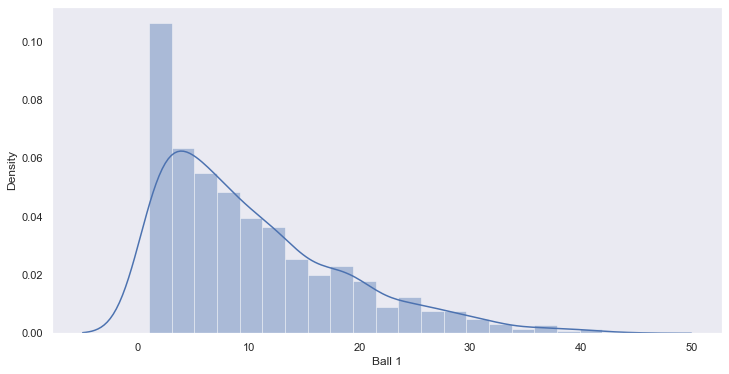

In [223]:
# show the distribution of winning combinations' totals
mpl.rc("figure", figsize=(12, 6))
ax = sns.distplot(df['Ball 1'])

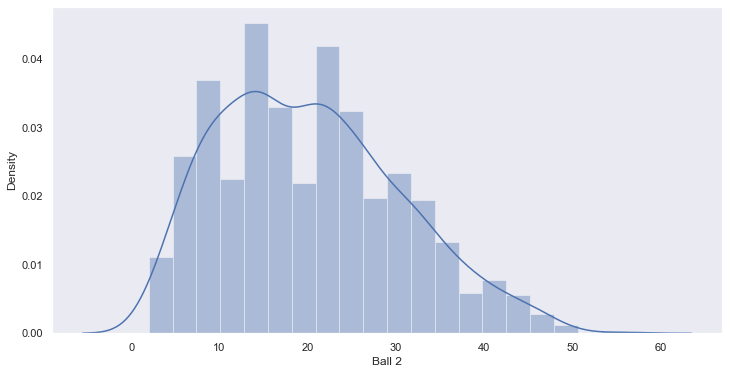

In [224]:
# show the distribution of winning combinations' totals
mpl.rc("figure", figsize=(12, 6))
ax = sns.distplot(df['Ball 2'])

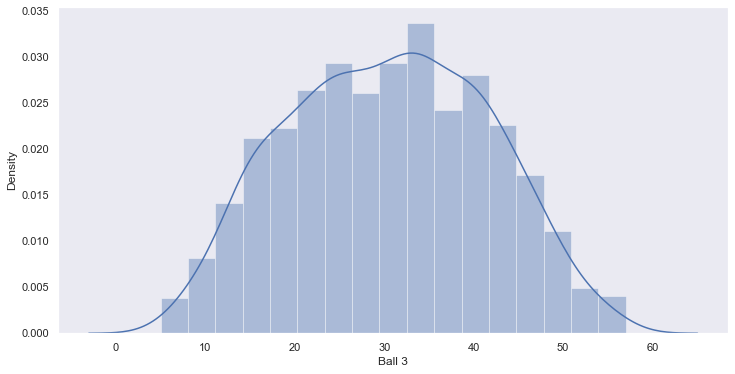

In [225]:
# show the distribution of winning combinations' totals
mpl.rc("figure", figsize=(12, 6))
ax = sns.distplot(df['Ball 3'])

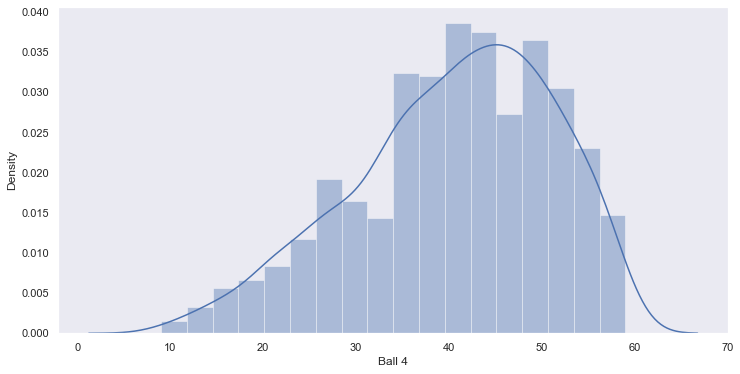

In [226]:
# show the distribution of winning combinations' totals
mpl.rc("figure", figsize=(12, 6))
ax = sns.distplot(df['Ball 4'])

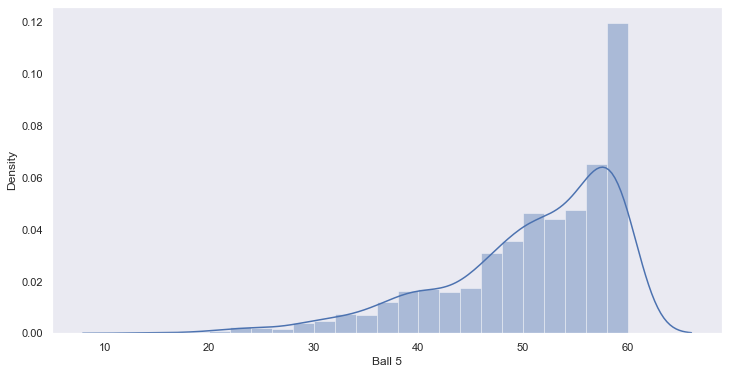

In [227]:
# show the distribution of winning combinations' totals
mpl.rc("figure", figsize=(12, 6))
ax = sns.distplot(df['Ball 5'])

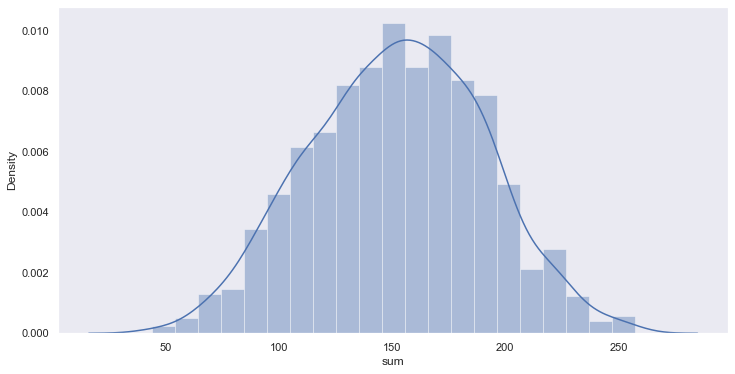

In [228]:
# show the distribution of winning combinations' totals
mpl.rc("figure", figsize=(12, 6))
ax = sns.distplot(df['sum'])

sns.lineplot(x='Ball 1', y='Ball 2', data=df)

<AxesSubplot:xlabel='Ball 1', ylabel='Ball 2'>

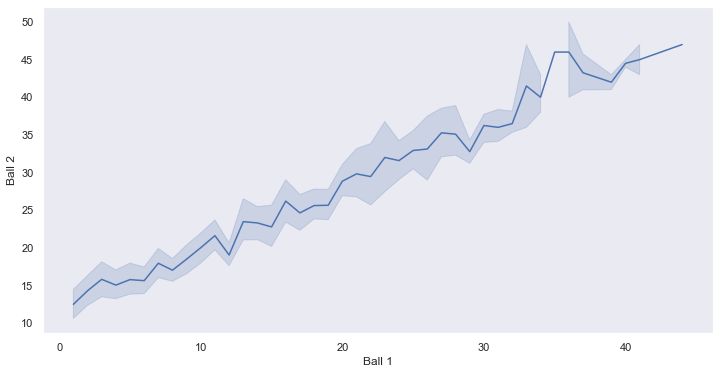

In [229]:
sns.lineplot(x='Ball 1', y='Ball 2', data=df)

# There is no correlation between 2-5

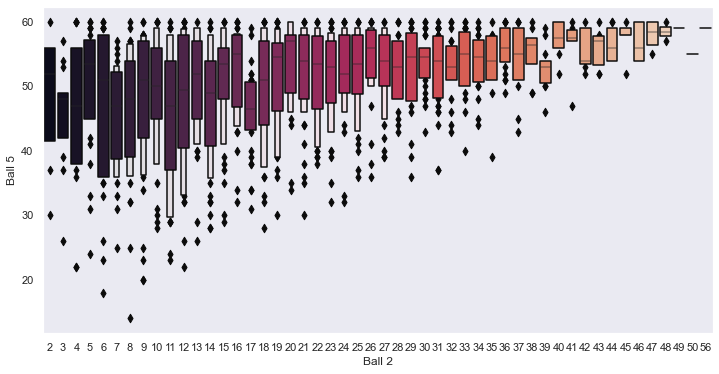

In [230]:
q1 = sns.boxenplot(x = df['Ball 2'], y = df['Ball 5'], palette = 'rocket' )

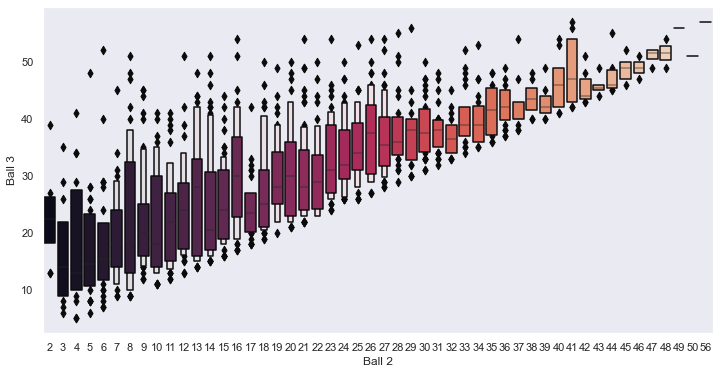

In [231]:
q1 = sns.boxenplot(x = df['Ball 2'], y = df['Ball 3'], palette = 'rocket' )

# From here we can clearly see the correlation between the 2nd and 3rd ball.

In [232]:
df.drop(['index'],axis=1, inplace=True)

In [233]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Distribution of all balls'}>

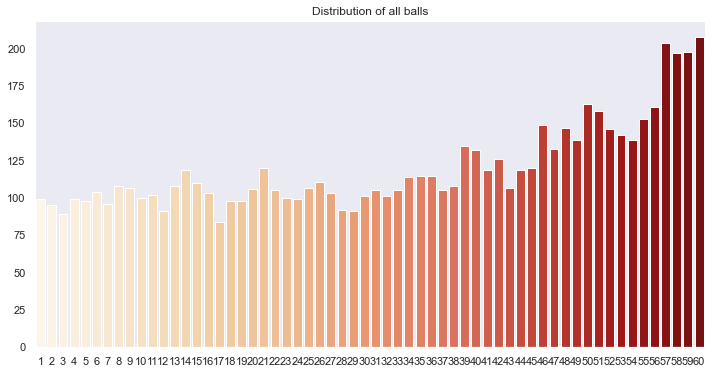

In [234]:
all_balls = {}
for i in range(1,6):
    ball_ser = df['Ball ' +str(i)].value_counts()
    for key in ball_ser.keys():
        all_balls[key] = all_balls.get(key,0) + ball_ser[key]
        
ball_ser = df['Ball 5'].value_counts()
for key in ball_ser.keys():
    all_balls[key] = all_balls.get(key,0) + ball_ser[key]

all_balls = pd.Series(all_balls) 

plt.title('Distribution of all balls')
plt.xticks(rotation=0)
sns.barplot(x=all_balls.keys(), y=all_balls.values, palette="OrRd")

<AxesSubplot:title={'center':'Distribution of ball 5'}>

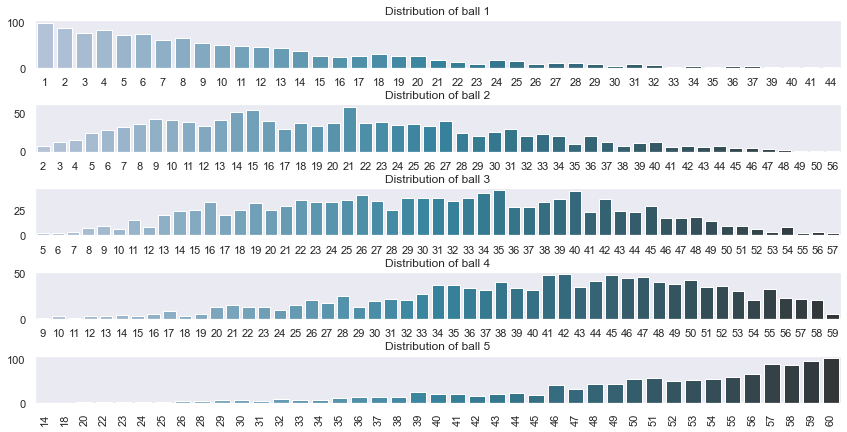

In [235]:
# Visualize the distributions of each ball
f, axes = plt.subplots(5, 1)
f.tight_layout() 
for i in range(1,6):
    ball_dist = df['Ball ' +str(i)].value_counts().sort_index()
    axes[i-1].set_title('Distribution of ball '+str(i))
    plt.xticks(rotation=90)
    sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[i-1], palette="PuBuGn_d")


sns.barplot(x=ball_dist.keys(), y=ball_dist.values, ax=axes[4], palette="PuBuGn_d")

# Note that as the number order increases, the drawn number gets larger.

0 Even, 5 Odd     35
2 Even, 3 Odd    405
3 Even, 2 Odd    351
4 Even, 1 Odd    195
1 Even, 4 Odd    174
5 Even, 0 Odd     41
dtype: int64


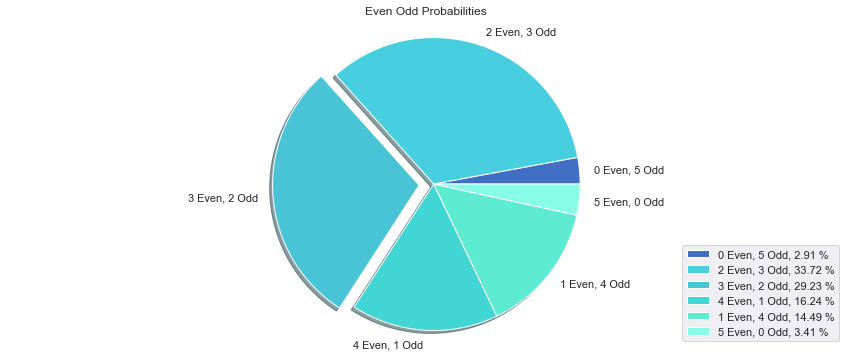

In [236]:
# Get number of even and odd numbers in a given list
def getNumberOfEvenAndOdd(numbers):
    countEven = 0
    countOdd = 0
    for number in numbers:
        if number % 2 == 0:
            countEven += 1
        else:
            countOdd += 1
    return str(countEven) + " Even, " +str(countOdd) +" Odd"

def visualizeEvenOddCombination():
    even_odd = {}
    numbers = []
    for index, draw in df.iterrows():
            numbers.append(int(draw['Ball 1']))
            numbers.append(int(draw['Ball 2']))
            numbers.append(int(draw['Ball 3']))
            numbers.append(int(draw['Ball 4']))
            numbers.append(int(draw['Ball 5']))
            
            even_odd[getNumberOfEvenAndOdd(numbers)] = even_odd.get(getNumberOfEvenAndOdd(numbers), 0) + 1 
            numbers = []
    even_odd_ser = pd.Series(even_odd)
    print(even_odd_ser)
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = even_odd.keys()
    sizes = list(even_odd.values())
    sizes = [x / float(len(df)) * 100 for x in sizes]
    explode = (0, 0, 0.1, 0, 0,0,)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots(figsize=(15, 6))
    colors = ["#416fc4", "#48cfdf", "#48c4d6", "#41d6d3", "#5decd2", "#87fde8","#b4f6eb"]
    ax1.pie(sizes, explode=explode, labels=labels,colors = colors, shadow=True)
    plt.title("Even Odd Probabilities")
    plt.legend( loc = 'lower right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    

visualizeEvenOddCombination()

# %34.25 of the winning number combinations made by 2 Even 3 Odds

2 High, 3 Low    358
3 High, 2 Low    405
4 High, 1 Low    200
1 High, 4 Low    171
5 High, 0 Low     38
0 High, 5 Low     29
dtype: int64


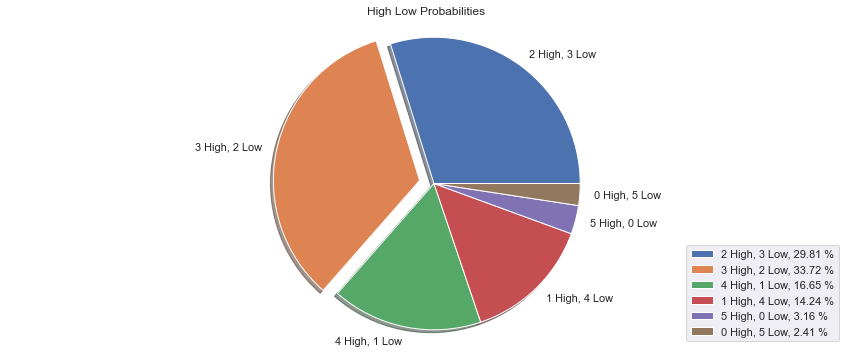

In [237]:
# Get number of even and odd numbers in a given list
def getNumberOfHighAndLow(numbers):
    countHigh = 0
    countLow = 0
    for number in numbers:
        if number >= 30:
            countHigh += 1
        else:
            countLow += 1
    return str(countHigh) + " High, " +str(countLow) +" Low"

def visualizeHighLowCombination():
    high_low = {}
    numbers = []
    for index, draw in df.iterrows():
            numbers.append(int(draw['Ball 1']))
            numbers.append(int(draw['Ball 2']))
            numbers.append(int(draw['Ball 3']))
            numbers.append(int(draw['Ball 4']))
            numbers.append(int(draw['Ball 5']))
            high_low[getNumberOfHighAndLow(numbers)] = high_low.get(getNumberOfHighAndLow(numbers), 0) + 1 
            numbers = []
    high_low_ser = pd.Series(high_low)
    print(high_low_ser)
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = high_low.keys()
    sizes = list(high_low.values())
    sizes = [x / float(len(df)) * 100 for x in sizes]
    explode = (0.0, 0.1, 0, 0, 0, 0,)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots(figsize=(15, 6))
    
    ax1.pie(sizes, explode=explode, labels=labels, shadow=True)
    plt.title("High Low Probabilities")
    plt.legend( loc = 'lower right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    

visualizeHighLowCombination()

## High numbers defined as numbers higher than 30. Low numbers are numbers that are lower than 30.

## Around 33% of jackpots were formed from 3 high and 2 low numbers.

In [238]:
def getMean(ball_dist):
    mean = 0
    allOcc = 0
    for value in list(ball_dist.keys()):
        for occ in list(ball_dist.values):
            mean += value * occ
            allOcc += occ
    mean = mean/allOcc
    return mean

sumOfMeans = 0
for i in range(1,6):
    ball_dist = df['Ball ' +str(i)].value_counts().sort_index()
    sumOfMeans += getMean(ball_dist)
sumOfMeans = int(sumOfMeans)
print(sumOfMeans)

152


In Range        641
Out of Range    560
dtype: int64


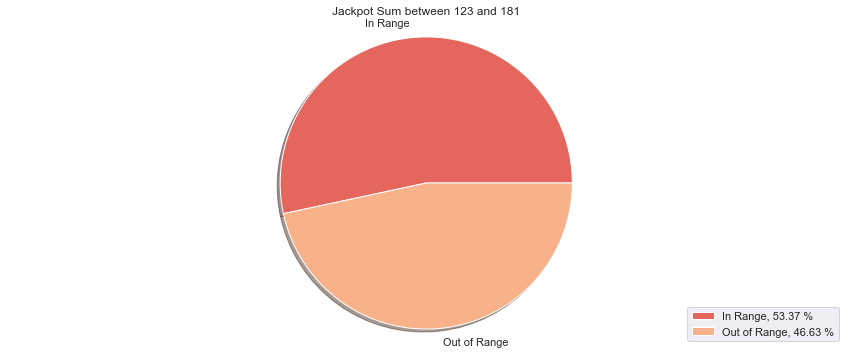

In [239]:
# Get number of even and odd numbers in a given list
def isNumbersInRange(numbers):
    sumOfNumbers = 0 
    for number in numbers:
        sumOfNumbers += number
    if (sumOfNumbers >= sumOfMeans - 29 and sumOfNumbers <= sumOfMeans + 29):
        return "In Range"
    else:
        return "Out of Range"    


def visualizeInRangeCombination():
    in_range = {}
    numbers = []
    for index, draw in df.iterrows():
            numbers.append(int(draw['Ball 1']))
            numbers.append(int(draw['Ball 2']))
            numbers.append(int(draw['Ball 3']))
            numbers.append(int(draw['Ball 4']))
            numbers.append(int(draw['Ball 5']))
            in_range[isNumbersInRange(numbers)] = in_range.get(isNumbersInRange(numbers), 0) + 1 
            numbers = []
    in_range_ser = pd.Series(in_range)
    print(in_range_ser)
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = in_range.keys()
    sizes = list(in_range.values())
    sizes = [x / float(len(df)) * 100 for x in sizes]
    fig1, ax1 = plt.subplots(figsize=(15, 6))
    colors = ["#E4665C", "#F9B189"]
    ax1.pie(sizes, labels=labels, shadow=True, colors=colors)
    plt.title("Jackpot Sum between " + str(sumOfMeans - 29) + " and " + str(int(sumOfMeans + 29)))
    plt.legend( loc = 'lower right', labels=['%s, %1.2f %%' % (l, s) for l, s in zip(labels, sizes)])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    

visualizeInRangeCombination()


### Checked for if there is a pattern in the sum of the balls
### According to the percentages we can't get any information from that.

In [240]:
lottery_ml = df.copy()

lottery_ml.to_csv("lottery.csv")

In [241]:
lottery_ml.drop(['sum'],axis=1,inplace=True)

In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from statistics import mean 
import copy
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11,8)})
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
plt.rcParams["axes.grid"] = False
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

In [243]:
# Normalizing and downscaling the data such that mean per column is 0
scaler = StandardScaler().fit(lottery_ml.values)
transformed_dataset = scaler.transform(lottery_ml.values)
lottery_ml_normalized = pd.DataFrame(data=transformed_dataset, index=lottery_ml.index)
lottery_ml_normalized

,0,1,2,3,4
0,-0.655281,-1.090051,-0.495274,-0.702991,0.514752
1,1.167305,0.656260,0.318439,1.540479,0.991956
2,-0.655281,2.305554,1.312977,0.605700,0.395451
3,0.802788,-0.216895,1.041739,0.886133,0.753354
4,-1.141304,0.171174,-0.676099,-1.076903,0.156849
...,...,...,...,...,...
1196,0.316765,0.268191,0.589676,1.540479,1.111257
1197,-1.019798,0.074156,-0.043211,0.699177,0.872655
1198,-0.655281,-0.604964,1.584214,0.044832,0.753354
1199,-0.533775,-0.022861,-0.856924,-0.609513,-0.201053


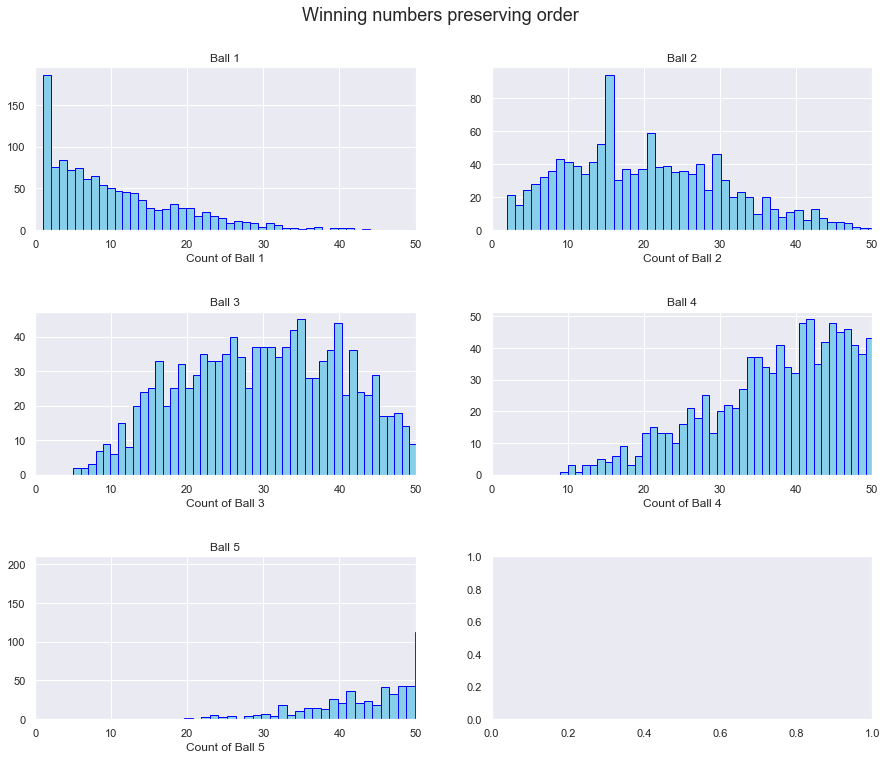

In [244]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Winning numbers preserving order", fontsize=18, y=0.95)

# loop through tickers andaxes
number_order = ["Ball " + str(i) for i in range(1, 6)]
for number_order, ax in zip(number_order, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[number_order].hist(ax=ax, bins=len(df[number_order].unique()), color='skyblue', ec='blue')
    ax.set_title(number_order)
    ax.set_xlabel("Count of " + number_order)
    ax.set_xlim([0, 50])
plt.show()


# From that we can say when order of Ball increase, value of ball increases also.

In [245]:
dfper2 = df.iloc[0::2]

In [246]:
dfper7 = df.iloc[0::7]

In [247]:
dfper3 = df.iloc[0::3]

In [248]:
dfper8 = df.iloc[0::8]

In [249]:
fig = px.line(dfper8, y="Ball 1")
fig.show()

In [250]:



fig = px.scatter(df, x="Ball 2", y="Ball 3" ,title='Life expectancy in Canada')
fig.show()

In [251]:


fig = px.line(df, y="Ball 1")
fig.show()

In [252]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [253]:
qf = df[1100:]

In [254]:
qf

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,sum
1100,5,26,48,50,54,183
1101,23,24,30,41,49,167
1102,19,21,49,58,60,207
1103,41,47,51,58,60,257
1104,2,38,43,47,55,185
...,...,...,...,...,...,...
1196,13,23,37,57,60,190
1197,2,21,30,48,58,159
1198,5,14,48,41,57,165
1199,6,20,21,34,49,130


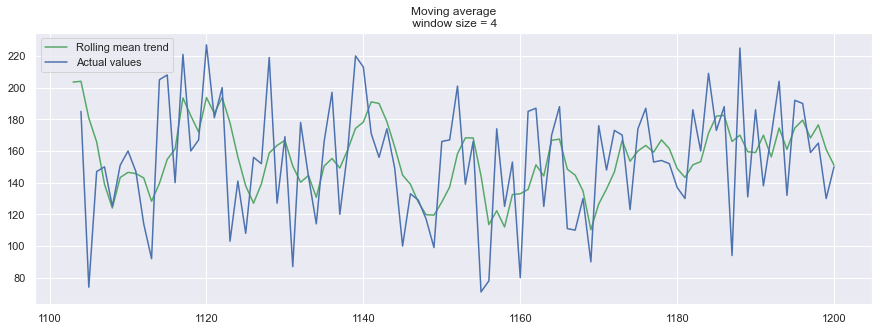

In [255]:
plotMovingAverage(qf['sum'], 4) 

In [256]:
# Importing everything from above

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [257]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

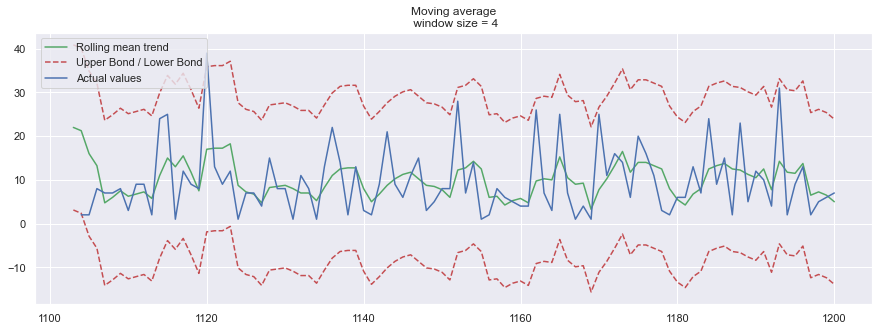

In [258]:
plotMovingAverage(qf['Ball 1'], 4, plot_intervals=True)